In [1]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
#importing the dataset
columns_name=['userId', 'productId', 'ratings','timestamp']
df=pd.read_csv('ratings_Electronics.csv',names=columns_name)
df

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [3]:
#dropping the timestamp column
df.drop('timestamp',axis=1,inplace=True)
df

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
5,A1QGNMC6O1VW39,0511189877,5.0
6,A3J3BRHTDRFJ2G,0511189877,2.0
7,A2TY0BTJOTENPG,0511189877,5.0
8,A34ATBPOK6HCHY,0511189877,5.0
9,A89DO69P0XZ27,0511189877,5.0


In [4]:
#now checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [5]:
#checking the number of rows and columns
rows,columns=df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  7824482
Number of columns:  3


In [6]:
#checking the datatypes of features in the dataset
df.dtypes

userId        object
productId     object
ratings      float64
dtype: object

In [7]:
#taking the subset of the dataset
df1=df.iloc[:50000,0:]
df1.shape

(50000, 3)

In [8]:
#checking if there are any null/missing value in the dataset
print('Number of missing values across columns:\n',df1.isnull().sum())

Number of missing values across columns:
 userId       0
productId    0
ratings      0
dtype: int64


In [9]:
#finding the minimum and maximum ratings to determine the rating scale
print('Minimum rating is: %d' %(df1.ratings.min()))
print('Maximum rating is: %d' %(df1.ratings.max()))
print('Rating scale is from: %d to %d' %(df1.ratings.min(),df1.ratings.max()))

Minimum rating is: 1
Maximum rating is: 5
Rating scale is from: 1 to 5


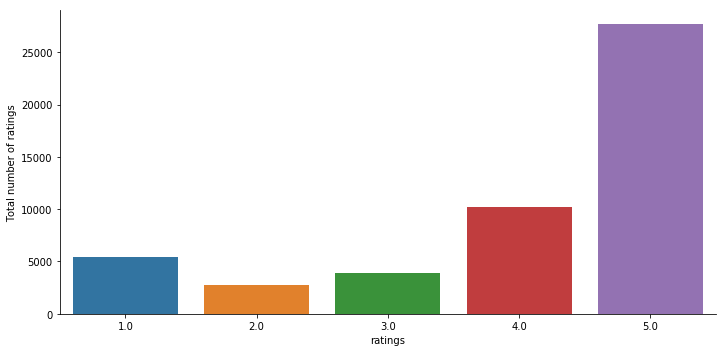

In [10]:
#checking the distribution of the ratings
sns.axes_style('whitegrid')
x = sns.catplot("ratings", data=df1, aspect=2.0,kind='count')
x.set_ylabels("Total number of ratings")

In [11]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df1.shape[0])
print("Total No of Users   :", len(np.unique(df1.userId)))
print("Total No of products  :", len(np.unique(df1.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 50000
Total No of Users   : 46554
Total No of products  : 3446


In [12]:
#Analysis of the ratings given by the user 
rating_per_user = df1.groupby(by='userId')['ratings'].count().sort_values(ascending=False)
rating_per_user.head()

userId
A231WM2Z2JL0U3    37
AY8Q1X7G96HV5     31
ALUNVOQRXOZIA     20
A1NVD0TKNS1GT5    19
A243HY69GIAHFI    18
Name: ratings, dtype: int64

In [13]:
rating_per_user.shape

(46554,)

In [14]:
#Analysis of rating given to the product 
rating_per_product = df1.groupby(by='productId')['ratings'].count().sort_values(ascending=False)
rating_per_product.head()

productId
B00001P4ZH    2075
B00004T8R2    1692
B00001WRSJ    1586
0972683275    1051
B00004SABB    1030
Name: ratings, dtype: int64

In [15]:
rating_per_product.shape

(3446,)

In [16]:
df1.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [17]:
df2 = (df1.groupby(by = ['productId'])['ratings'].count().reset_index().rename(columns = {'ratings': 'totalRatingCount'})[['productId', 'totalRatingCount']])
df2.head()

,productId,totalRatingCount
0,0132793040,1
1,0321732944,1
2,0439886341,3
3,0511189877,6
4,0528881469,27


In [18]:
df2.shape

(3446, 2)

In [19]:
df1.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [20]:
rating_with_totalRatingCount = df1.merge(df2,left_on = 'productId',right_on = 'productId',how = 'left')
rating_with_totalRatingCount.head()

,userId,productId,ratings,totalRatingCount
0,AKM1MP6P0OYPR,0132793040,5.0,1
1,A2CX7LUOHB2NDG,0321732944,5.0,1
2,A2NWSAGRHCP8N5,0439886341,1.0,3
3,A2WNBOD3WNDNKT,0439886341,3.0,3
4,A1GI0U4ZRJA8WN,0439886341,1.0,3


In [21]:
rating_with_totalRatingCount.shape

(50000, 4)

In [22]:
df3 = rating_with_totalRatingCount.copy()

In [23]:
df3.head()

,userId,productId,ratings,totalRatingCount
0,AKM1MP6P0OYPR,0132793040,5.0,1
1,A2CX7LUOHB2NDG,0321732944,5.0,1
2,A2NWSAGRHCP8N5,0439886341,1.0,3
3,A2WNBOD3WNDNKT,0439886341,3.0,3
4,A1GI0U4ZRJA8WN,0439886341,1.0,3


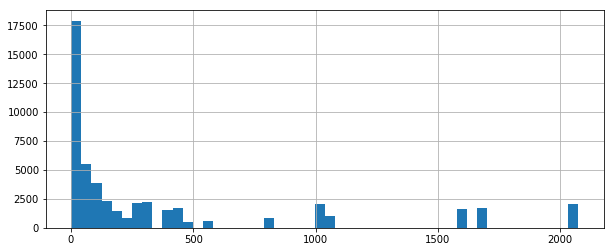

In [24]:
plt.figure(figsize=(10,4))
df3['totalRatingCount'].hist(bins=50)

In [25]:
df3['totalRatingCount'].unique()

array([   1,    3,    6,   27,    8,    5,   15,    2,   14,   31,   13,
         10, 1051,   20,    4,   23,  250,   29,   82,   26,  139,  171,
        484,  431,   84,  222,  138,   47,   17,    7,   32,    9,   21,
         12,   60,   24,   83,  107,   28,   19,   95,   38,   18,   36,
        199,  110,  119,   11,   70,   42,   39,   35,  174,   79,   62,
         25,   16,   98,  124,   33,   52,  185,  332,   49,   51,   53,
         30,  262,   99,   61,   76,   50,   34,   86,   66,   57,   56,
        109,   68,  149,  128,  105,   89,  321,   58,   37,   74,   22,
        106,   40,   43,  122,   96,   44,   90,  121,   59,   78,  282,
        103,   55,  392,  183,   72,  277,  100,  457,  209,  260,  579,
        430, 2075,  387,   45,  132,   94,  326,  268,  303, 1586,   88,
         46,   64,  126,   91,  423,  137,   73,  184,  104,   48,  148,
        254,  313,  144,  151,  195,   65,  102,  179,   77, 1030,  398,
       1006,  146,  120,  136,   71,  286,  403, 16

In [26]:
df3['totalRatingCount'].max()

2075

In [27]:
df3['totalRatingCount'].min()

1

In [28]:
threshold = 50
df4 = df3.query('totalRatingCount >= @threshold')
df4.head()

,userId,productId,ratings,totalRatingCount
183,A1BKC6B7YHYTVV,0972683275,4.0,1051
184,AWVFSIB42LHKJ,0972683275,4.0,1051
185,A36MQBNADRH8YY,0972683275,5.0,1051
186,A3SRXMPLAEZ6DP,0972683275,4.0,1051
187,A20XXTXWF2TCPY,0972683275,5.0,1051


In [29]:
df4.shape

(30958, 4)

In [30]:
print(len(np.unique(df4['userId'])))
print(len(np.unique(df4['productId'])))

29974
169


In [31]:
# Constructing the Pivot table
df5 = df4.pivot_table(index='productId',columns='userId',values='ratings').fillna(0)
df5.head()

userId,A014623426J5CM7M12MBW,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A06374853B2OXBKB6H1YT,A0641581307AKT5MAOU0Q,A0677968MUIZV1URPJAN,...,AZXP46IB63PU8,AZXWUZ9PPSOTL,AZYTSU42BZ7TP,AZZA7IQWTXCH3,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZP8BC9WE0N8,AZZST8OYL5P4Q,AZZUBI2MEAHI9,AZZZEWADNFNUM
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1400532620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df6 = csr_matrix(df5.values)
df6

<169x29974 sparse matrix of type '<class 'numpy.float64'>'
	with 30958 stored elements in Compressed Sparse Row format>

In [33]:
#Using KNN Algorithm
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df6)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [34]:
query_index = np.random.choice(df5.shape[0])
query_index

149

In [35]:
df5.index[query_index]

'B00004SPUN'

In [36]:
distances,indices = model_knn.kneighbors(df5.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

In [37]:
print(distances)
print(indices)

[[1.55431223e-15 9.88578128e-01 9.92542296e-01 9.92628024e-01
  9.94114306e-01 9.94352621e-01]]
[[149 123  48 144 139  99]]


In [38]:
#flatten converts a 2d array into 1d array
print(distances.flatten())

[1.55431223e-15 9.88578128e-01 9.92542296e-01 9.92628024e-01
 9.94114306e-01 9.94352621e-01]


In [39]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for product {0}:\n'.format(df5.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df5.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for product B00004SPUN:

1: B000038ABH, with distance of 0.9885781282149935:
2: B00000J3Q7, with distance of 0.9925422957544553:
3: B00004SABJ, with distance of 0.9926280239891135:
4: B00004RG6K, with distance of 0.9941143061320826:
5: B00001ZWXA, with distance of 0.9943526208808731:
